Data- 500 Cities: Local Data for Better Health 2017
Overview of the project: https://www.cdc.gov/500cities/pdf/500Cities-FactSheet-082217.pdf
List of cities by state: https://www.cdc.gov/500cities/pdf/500-Cities-Listed-by-State.pdf

Examples of maps of variables (28K census tracts condensed into 500 cities): https://www.cdc.gov/500cities/map-books.htm#accordion-3-card-3

2017 data (used for modeling): https://catalog.data.gov/dataset/

List of variable descriptions: https://nccd.cdc.gov/500_Cities/rdPage.aspx?rdReport=DPH_500_Cities.ComparisonReport



# Data Wrangling

In [0]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import sklearn

url = "<insert the URL to the data source>"
dataset = pd.read_csv(url, header = 0)

np.random.seed(8989)
#Renaming the columns
dataset.rename( columns = {'StateAbbr':'State','PlaceName': 'City','PlaceFIPS':'FIPS' },inplace = True)

#Dataset with CrudePrev columns
df_data = pd.concat([dataset.iloc[:,0:4], dataset.filter(like='CrudePrev', axis=1)],axis=1)
dataset.filter(like='CrudePrev', axis=1)

# Checking the missing values
df_data.isnull().sum()
df_missing = df_data[df_data['PAPTEST_CrudePrev'].isnull()][['State','City','FIPS', 'PAPTEST_CrudePrev']]


#Replace the value with the mean of the column or the State average. 
#Calculate mean of PAPTEST_CrudePrev
Avg_PAPTEST_CrudePrev = df_data['PAPTEST_CrudePrev'].mean()


#Let's see what's the average PAPTEST_CrudePrev per state
stateAvg_PAPTEST_CrudePrev = df_data['PAPTEST_CrudePrev'].groupby(by = df_data['State']).mean()
stateAvg_PAPTEST_CrudePrev = stateAvg_PAPTEST_CrudePrev.fillna(Avg_PAPTEST_CrudePrev)

# Since state means also contain Nan, its better to fill Nan with mean of the column


df_data['PAPTEST_CrudePrev'] = df_data['PAPTEST_CrudePrev'].fillna(Avg_PAPTEST_CrudePrev)
df_data.isnull().sum()


State                     0
City                      0
FIPS                      0
Population2010            0
ACCESS2_CrudePrev         0
ARTHRITIS_CrudePrev       0
BINGE_CrudePrev           0
BPHIGH_CrudePrev          0
BPMED_CrudePrev           0
CANCER_CrudePrev          0
CASTHMA_CrudePrev         0
CHD_CrudePrev             0
CHECKUP_CrudePrev         0
CHOLSCREEN_CrudePrev      0
COLON_SCREEN_CrudePrev    0
COPD_CrudePrev            0
COREM_CrudePrev           0
COREW_CrudePrev           0
CSMOKING_CrudePrev        0
DENTAL_CrudePrev          0
DIABETES_CrudePrev        0
HIGHCHOL_CrudePrev        0
KIDNEY_CrudePrev          0
LPA_CrudePrev             0
MAMMOUSE_CrudePrev        0
MHLTH_CrudePrev           0
OBESITY_CrudePrev         0
PAPTEST_CrudePrev         0
PHLTH_CrudePrev           0
SLEEP_CrudePrev           0
STROKE_CrudePrev          0
TEETHLOST_CrudePrev       0
dtype: int64

In [0]:
#Remove health outcome variables except diabetes
df_data2 = df_data.drop(['ARTHRITIS_CrudePrev','BPHIGH_CrudePrev','CANCER_CrudePrev','CASTHMA_CrudePrev','CHD_CrudePrev','COPD_CrudePrev','COPD_CrudePrev','HIGHCHOL_CrudePrev','KIDNEY_CrudePrev',
                         'MHLTH_CrudePrev','PHLTH_CrudePrev','STROKE_CrudePrev','TEETHLOST_CrudePrev'],axis=1)

# Choosing Diabetes as target variable
y = df_data2.filter(items =['DIABETES_CrudePrev'], axis=1)
x = df_data2.drop(['State','City','FIPS','Population2010','DIABETES_CrudePrev'],axis = 1)
x.head()


list(x.columns) 




['ACCESS2_CrudePrev',
 'BINGE_CrudePrev',
 'BPMED_CrudePrev',
 'CHECKUP_CrudePrev',
 'CHOLSCREEN_CrudePrev',
 'COLON_SCREEN_CrudePrev',
 'COREM_CrudePrev',
 'COREW_CrudePrev',
 'CSMOKING_CrudePrev',
 'DENTAL_CrudePrev',
 'LPA_CrudePrev',
 'MAMMOUSE_CrudePrev',
 'OBESITY_CrudePrev',
 'PAPTEST_CrudePrev',
 'SLEEP_CrudePrev']

# Data Standardization



Min max scalar just changes the scale and range of the data. 
Note- Normalization is a more radical transformation. The point of normalization is to change your observations so that they can be described as a normal distribution. 
Here, we are not applying normalization

In [0]:
from sklearn.preprocessing import MinMaxScaler
from numpy import set_printoptions
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(x)
#rescaledY = scaler.fit_transform(y)
set_printoptions(precision=3)

#scaled_df = pd.concat([pd.DataFrame(rescaledX),pd.DataFrame(rescaledY)],axis=1) 
scaled_df = pd.DataFrame(rescaledX)
scaled_df.columns = [
 'ACCESS2_CrudePrev',
 'BINGE_CrudePrev',
 'BPMED_CrudePrev',
 'CHECKUP_CrudePrev',
 'CHOLSCREEN_CrudePrev',
 'COLON_SCREEN_CrudePrev',
 'COREM_CrudePrev',
 'COREW_CrudePrev',
 'CSMOKING_CrudePrev',
 'DENTAL_CrudePrev',
 'LPA_CrudePrev',
 'MAMMOUSE_CrudePrev',
 'OBESITY_CrudePrev',
 'PAPTEST_CrudePrev',
 'SLEEP_CrudePrev']

scaled_df = pd.concat([scaled_df,y],axis=1, sort='False')

scaled_df.head()


ACCESS2_CrudePrev  BINGE_CrudePrev  ...  SLEEP_CrudePrev  DIABETES_CrudePrev
0           0.083333         0.693989  ...         0.378906                 6.7
1           0.388889         0.426230  ...         0.527344                12.1
2           0.088384         0.573770  ...         0.312500                 6.5
3           0.204545         0.551913  ...         0.332031                 8.9
4           0.469697         0.393443  ...         0.542969                12.1

[5 rows x 16 columns]

#Exploratory Data Analysis

In [0]:
scaled_df.describe()


ACCESS2_CrudePrev  BINGE_CrudePrev  ...  SLEEP_CrudePrev  DIABETES_CrudePrev
count         500.000000       500.000000  ...       500.000000          500.000000
mean            0.284187         0.467552  ...         0.439500            9.997800
std             0.158302         0.146686  ...         0.167052            2.397196
min             0.000000         0.000000  ...         0.000000            4.200000
25%             0.174242         0.377049  ...         0.324219            8.275000
50%             0.250000         0.461749  ...         0.427734            9.800000
75%             0.366162         0.551913  ...         0.542969           11.500000
max             1.000000         1.000000  ...         1.000000           21.600000

[8 rows x 16 columns]

In [0]:
df_data2 = df_data2.iloc[:,0:4]
scaled_df = pd.concat([df_data2,scaled_df], axis= 1)
scaled_df.head()

State      City  ...  SLEEP_CrudePrev  DIABETES_CrudePrev
0    CA    Folsom  ...         0.378906                 6.7
1    FL     Largo  ...         0.527344                12.1
2    CA  Berkeley  ...         0.312500                 6.5
3    CA      Napa  ...         0.332031                 8.9
4    FL   Sunrise  ...         0.542969                12.1

[5 rows x 20 columns]

In [0]:
# correlation
pd.set_option('precision', 2)
print(df_data2.corr(method='pearson'))
print(scaled_df.corr(method='pearson'))

                FIPS  Population2010
FIPS            1.00            0.03
Population2010  0.03            1.00
                            FIPS  ...  DIABETES_CrudePrev
FIPS                    1.00e+00  ...            5.58e-02
Population2010          3.31e-02  ...            7.39e-02
ACCESS2_CrudePrev       1.63e-01  ...            6.03e-01
BINGE_CrudePrev         4.66e-03  ...           -5.94e-01
BPMED_CrudePrev         2.38e-01  ...            5.59e-01
CHECKUP_CrudePrev       9.82e-02  ...            4.93e-01
CHOLSCREEN_CrudePrev   -2.23e-01  ...           -9.13e-02
COLON_SCREEN_CrudePrev -1.22e-01  ...           -6.00e-01
COREM_CrudePrev         1.43e-01  ...           -5.63e-01
COREW_CrudePrev        -2.92e-02  ...           -6.39e-01
CSMOKING_CrudePrev      2.56e-01  ...            6.21e-01
DENTAL_CrudePrev       -7.79e-02  ...           -7.55e-01
LPA_CrudePrev           1.10e-01  ...            8.58e-01
MAMMOUSE_CrudePrev     -2.00e-01  ...            1.71e-01
OBESITY_CrudePrev  

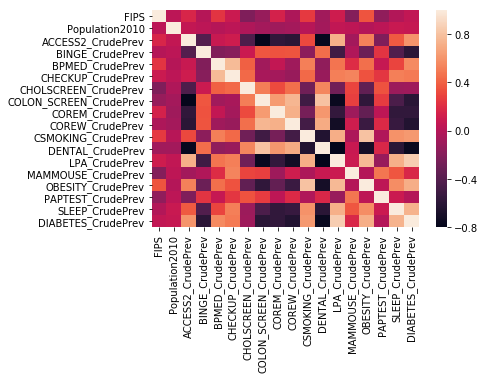

In [0]:
import seaborn as sns
corr = scaled_df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

We see that there is strong negative correlation between our target variable and Diabetes_Crude_Prev, Corem and Corew and Dental
There is a positive correlation between LPA, Obesity, Sleep and Smoking

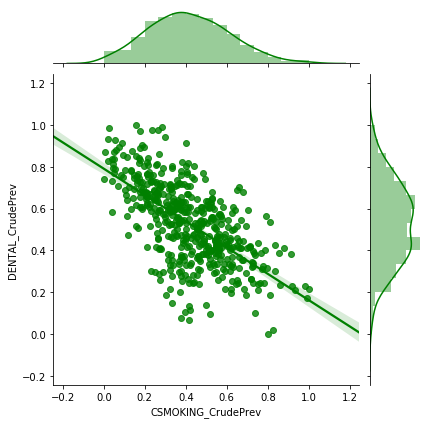

In [0]:
sns.jointplot(data=scaled_df, x='CSMOKING_CrudePrev', y='DENTAL_CrudePrev', kind='reg', color='g')
plt.show()

We used this method to display data points according to two variables SMOKE and DENTAL, along with both their distributions, kernel density estimators, and an optional regression that fits the data. With reg we indicate that we want a regression fit to the data.

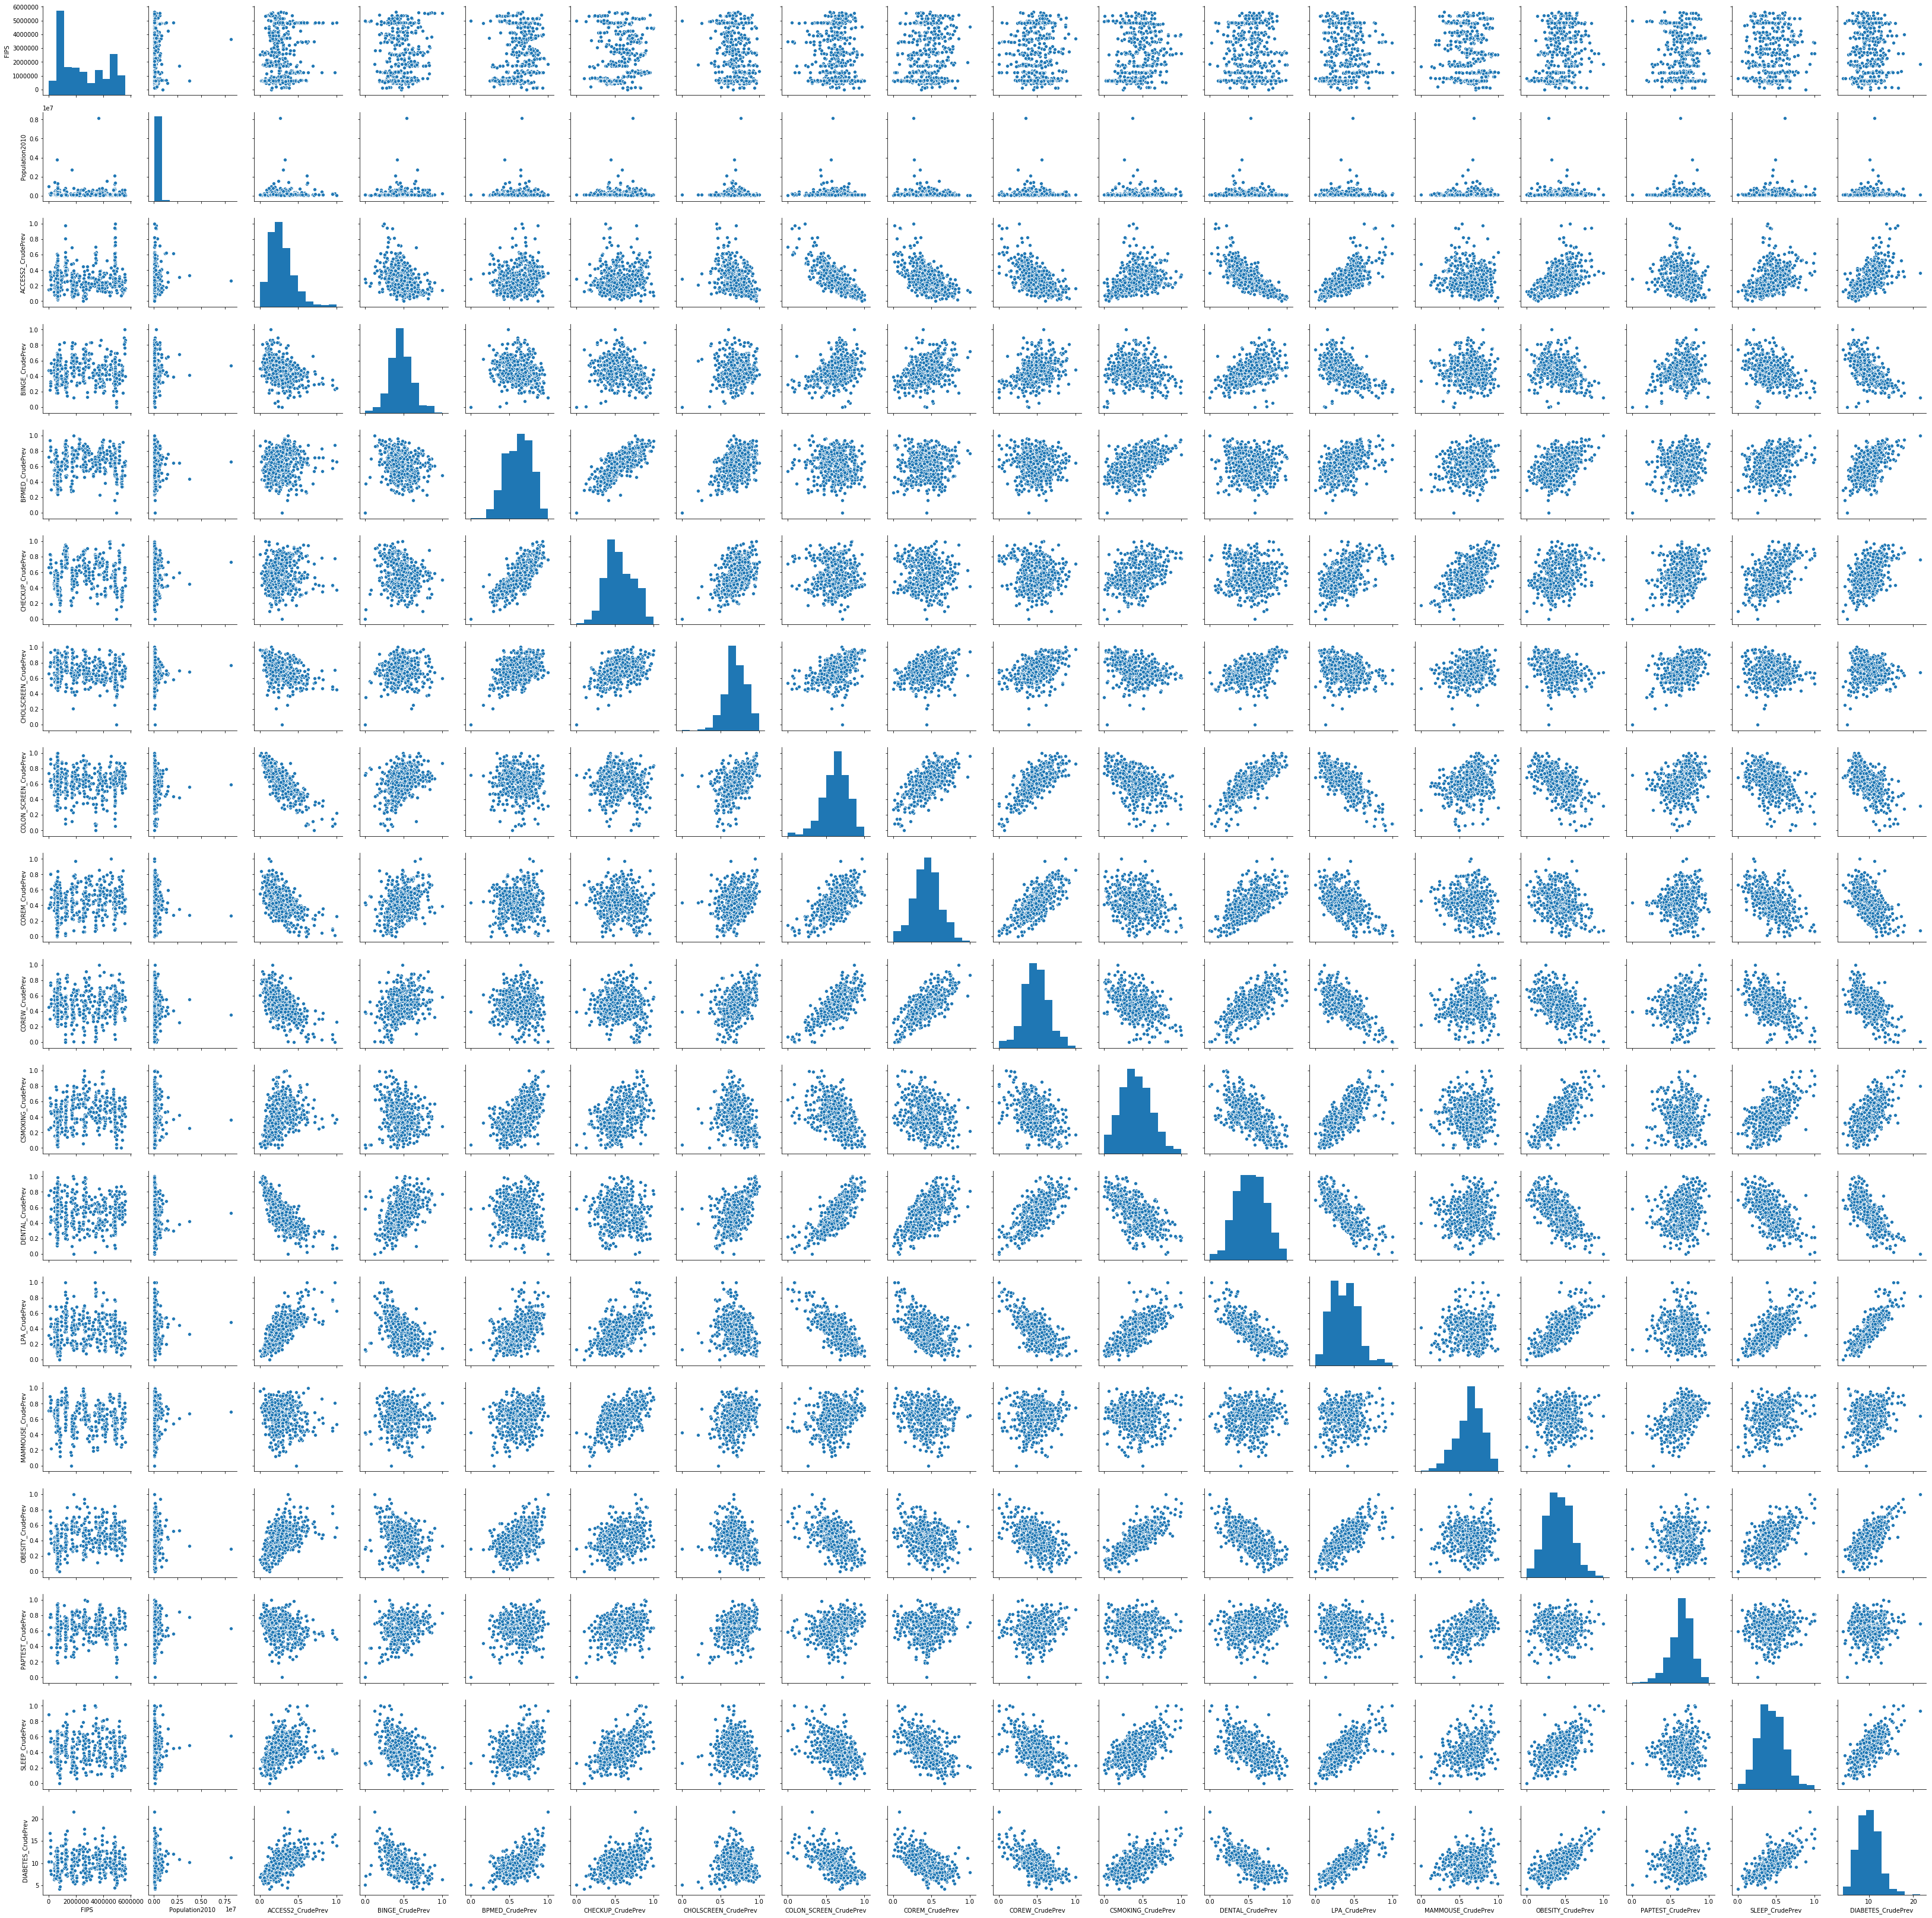

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(scaled_df)



In [0]:
import pandas as pd
import numpy as np

rs = np.random.RandomState(0)
df = pd.DataFrame(scaled_df)
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None)

# Trial models to understand variable importance

We chose the GLM from poisson family as our variables are in form of percentages representing the counts.

In [0]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

from __future__ import print_function
import numpy as np
import statsmodels.api as sm
from scipy import stats
from matplotlib import pyplot as plt

X = scaled_df.iloc[:,4:-1]
Y = scaled_df.iloc[:,-1]



glm_pois = sm.GLM(Y,X, family=sm.families.Poisson())
res = glm_pois.fit()


pred = res.predict(X)

print(res.summary())



                 Generalized Linear Model Regression Results                  
Dep. Variable:     DIABETES_CrudePrev   No. Observations:                  500
Model:                            GLM   Df Residuals:                      485
Model Family:                 Poisson   Df Model:                           14
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1076.5
Date:                Sun, 18 Aug 2019   Deviance:                       88.359
Time:                        18:30:00   Pearson chi2:                     90.2
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
ACCESS2_CrudePrev          0

We observed the pvalue of the variables to understand their importance. However, we dint drop variables based on this sole criteria

We also Interpreted the coefficients, we observe that a unit increase in LPA causes  1.02 unit increase in diabetes.


# FEATURE ENGINEERING

In [0]:
##INTERACTION VARIABLE -- OBESITY * LPA (Lack of physical activty)
## we think this tranformation would be useful because obesity and lack of physical activty usually are correlated (from a conceptual standpoint)
# df_inter = pd.Series(scaled_df['OBESITY_CrudePrev'] * scaled_df['LPA_CrudePrev'])
# df_inter = df_inter.to_frame(name=None)
# df_inter.columns=['Obesity_LPA']
# scaled_df = pd.concat([scaled_df,df_inter],axis=1, sort='False')

# scaled_df.head()

In [0]:
# scaled_df['Obesity_LPA_normalize'] = (scaled_df['Obesity_LPA']-scaled_df['Obesity_LPA'].min()) / (scaled_df['Obesity_LPA'].max()-scaled_df['Obesity_LPA'].min())
# scaled_df= scaled_df.drop('Obesity_LPA', axis=1)
# scaled_df.head()

We saw there was a strong positive correlation between Obesity and Smoking as well as Obesity and lack of physical activity. Thus we reduced the 2 variables into one by taking the product of Obesity and LPA . But the performance of our model did not improve. Hence we dropped this feature rom modeling.

In [0]:
## Sleep less than 7 hours flag - value of 1 assigned to rows where sleep less than 70 hours is 50% or higher and a value of 0 for less than 50% 

scaled_df['Flag_50_perc_Sleep_less_than7hrs']= np.where(scaled_df['SLEEP_CrudePrev']>= 0.5 , 1,0)
scaled_df.head()

State      City  ...  DIABETES_CrudePrev  Flag_50_perc_Sleep_less_than7hrs
0    CA    Folsom  ...                 6.7                                 0
1    FL     Largo  ...                12.1                                 1
2    CA  Berkeley  ...                 6.5                                 0
3    CA      Napa  ...                 8.9                                 0
4    FL   Sunrise  ...                12.1                                 1

[5 rows x 21 columns]

In [0]:
## Large City Flag

scaled_df['Flag_Large_City']= np.where(scaled_df['Population2010']>= 500000 , 1,0)
len(scaled_df[scaled_df.Flag_Large_City==1])

34

We wanted to find the number of cities where people sleep less than 7 hours and check its relation with the health condition of diabetes.

### smoking and dental interation term

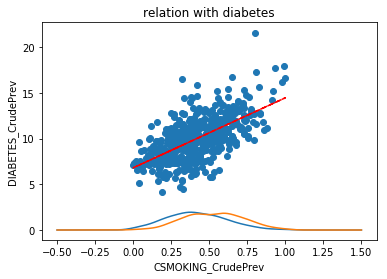

In [0]:
scaled_df['CSMOKING_CrudePrev'].plot(kind = 'density')
scaled_df['DENTAL_CrudePrev'].plot(kind = 'density')
data1 = scaled_df[['CSMOKING_CrudePrev', 'DIABETES_CrudePrev']]
x = data1['CSMOKING_CrudePrev']
y = data1['DIABETES_CrudePrev']
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
tit = 'relation with diabetes'
plt.plot(x,p(x),"r--")
plt.title(tit)
plt.xlabel('CSMOKING_CrudePrev')
plt.ylabel('DIABETES_CrudePrev')

plt.show()

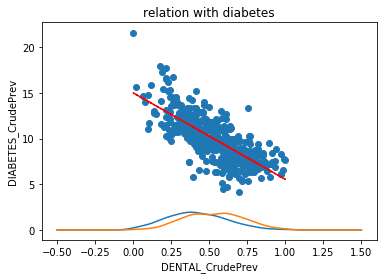

In [0]:
scaled_df['CSMOKING_CrudePrev'].plot(kind = 'density')
scaled_df['DENTAL_CrudePrev'].plot(kind = 'density')
data1 = scaled_df[['DENTAL_CrudePrev', 'DIABETES_CrudePrev']]
x = data1['DENTAL_CrudePrev']
y = data1['DIABETES_CrudePrev']
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
tit = 'relation with diabetes'
plt.plot(x,p(x),"r--")
plt.title(tit)
plt.xlabel('DENTAL_CrudePrev')
plt.ylabel('DIABETES_CrudePrev')


plt.show()

We observed that both the values are equally distributed and both are a measure which is negatively correlated with diabetes. We can add them to get a new feature

In [0]:
df_measure = pd.Series((scaled_df['CSMOKING_CrudePrev'] * scaled_df['DENTAL_CrudePrev']))
df_measure = df_measure.to_frame(name=None)
df_measure.columns=['Smoke_Dental_inter']
scaled_df = pd.concat([scaled_df,df_measure],axis=1, sort='False')

In [0]:
#scaled_df.drop (['Obesity_LPA_normalize'], axis = 1,inplace = True)

In [0]:
scaled_df.head()

State      City  ...  Flag_Large_City  Smoke_Dental_inter
0    CA    Folsom  ...                0                0.14
1    FL     Largo  ...                0                0.24
2    CA  Berkeley  ...                0                0.09
3    CA      Napa  ...                0                0.20
4    FL   Sunrise  ...                0                0.18

[5 rows x 23 columns]

#Data Preperation

Set seed and shuffle

In [0]:
import numpy.random as rand
seed = 123
rand.RandomState(seed)

from sklearn.utils import shuffle
scaled_df = shuffle(scaled_df)
scaled_df.head()


State         City  ...  Flag_Large_City  Smoke_Dental_inter
482    ID   Boise City  ...                0                0.18
236    GA     Columbus  ...                0                0.26
252    TN  Chattanooga  ...                0                0.29
146    MA     Lawrence  ...                0                0.18
240    AZ     Surprise  ...                0                0.23

[5 rows x 23 columns]

80/10/10 Training/Validation/Test Split

In [0]:
print("Original Shape:")
print(scaled_df.shape)

train = scaled_df.iloc[:400,:]
val = scaled_df.iloc[400:450,:]
test = scaled_df.iloc[450:,:]

# print("Train Shape:")
# print(train.shape)
# print("Validation Shape:")
# print(val.shape)
# print("Test Shape:")
# print(test.shape)

ytrain = train['DIABETES_CrudePrev']
yval = val['DIABETES_CrudePrev']
ytest = test['DIABETES_CrudePrev']

xtrain = train.drop(['State','City','DIABETES_CrudePrev','Population2010','MAMMOUSE_CrudePrev','PAPTEST_CrudePrev','COREM_CrudePrev'],axis=1)#,'Flag_Large_City','CHECKUP_CrudePrev','CHOLSCREEN_CrudePrev','MAMMOUSE_CrudePrev','PAPTEST_CrudePrev','Obesity_LPA_normalize'],axis=1)
xval = val.drop(['State','City','DIABETES_CrudePrev','Population2010','MAMMOUSE_CrudePrev','PAPTEST_CrudePrev','COREM_CrudePrev'],axis=1)#,'Flag_Large_City','CHECKUP_CrudePrev','CHOLSCREEN_CrudePrev','MAMMOUSE_CrudePrev','PAPTEST_CrudePrev','Obesity_LPA_normalize'],axis=1)
xtest = test.drop(['State','City','DIABETES_CrudePrev','Population2010','MAMMOUSE_CrudePrev','PAPTEST_CrudePrev','COREM_CrudePrev'],axis=1)#,'Flag_Large_City','CHECKUP_CrudePrev','CHOLSCREEN_CrudePrev','MAMMOUSE_CrudePrev','PAPTEST_CrudePrev','Obesity_LPA_normalize'],axis=1)

xtrain.set_index(['FIPS'])
xval.set_index(['FIPS'])
xtest.set_index(['FIPS'])

Original Shape:
(500, 23)


ACCESS2_CrudePrev  ...  Smoke_Dental_inter
FIPS                        ...                    
2239475               0.33  ...                0.21
662938                0.09  ...                0.13
5164000               0.30  ...                0.30
678582                0.08  ...                0.10
541000                0.19  ...                0.32
665000                0.46  ...                0.07
614218                0.15  ...                0.18
832155                0.33  ...                0.17
4805000               0.41  ...                0.17
1810342               0.05  ...                0.16
681666                0.19  ...                0.17
2053775               0.14  ...                0.17
624680                0.38  ...                0.12
1823278               0.07  ...                0.23
2270000               0.33  ...                0.13
666000                0.18  ...                0.13
1840788               0.24  ...                0.26
2071000               0.33  ...                0.28
4550875               0.43  ...                0.15
1210275               0.39  ...                0.21
4837000               0.54  ...                0.16
3474000               0.54  ...                0.19
670098                0.18  ...                0.16
603526                0.31  ...                0.19
2676460               0.15  ...                0.45
5539225               0.24  ...                0.33
812815                0.07  ...                0.17
1263000               0.36  ...                0.25
2240735               0.26  ...                0.25
5367167               0.14  ...                0.26
1245975               0.47  ...                0.16
3350260               0.19  ...                0.29
603666                0.47  ...                0.07
1349000               0.52  ...                0.15
4817000               0.59  ...                0.14
4147000               0.23  ...                0.26
5305280               0.15  ...                0.17
659920                0.12  ...                0.18
4105800               0.12  ...                0.21
616532                0.21  ...                0.15
2038900               0.24  ...                0.24
1702154               0.08  ...                0.16
669070                0.19  ...                0.12
646842                0.20  ...                0.16
2754880               0.09  ...                0.26
2562535               0.08  ...                0.19
1831000               0.40  ...                0.15
2707966               0.14  ...                0.30
1239425               0.39  ...                0.24
633000                0.26  ...                0.14

[50 rows x 15 columns]

In [0]:
# Principal component analysis
#X = scaled_df.drop(['DIABETES_CrudePrev'],axis = 1)
from sklearn.decomposition import PCA
#pca = PCA(n_components=2)
#pca.fit(X) 

#Model Fitting

###Baseline Model (Average) 

In [0]:
baseline_prediction = ytrain.mean()
print("Prediction: ",baseline_prediction)

baseline_predictions = []
for i in range(50):
  baseline_predictions.append(baseline_prediction)

print("MSE: ",((ytest-baseline_predictions)*(ytest-baseline_predictions)).mean())

Prediction:  9.998999999999997
MSE:  6.032988999999997


##Random Forest 

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

#Random Forest
scaler = StandardScaler().fit(xtrain)
rescaledX = scaler.transform(xtrain)
param_grid = dict(n_estimators=np.array([5,10,15,20,25,30,35,40]))
max_features = 3
num_folds = 5
model = RandomForestRegressor(random_state=seed, max_features=max_features)
scoring = 'neg_mean_squared_error'

kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(xtrain, ytrain)
model = model.fit(xtrain, ytrain)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']






Best: -0.810340 using {'n_estimators': 25}


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [0]:
y_predict_train_rf = model.predict(xtrain)
y_predict_val_rf = model.predict(xval)
y_predict_test_rf = model.predict(xtest)

###MAE Random forest

In [0]:
from sklearn.metrics import mean_absolute_error
mae_train = mean_absolute_error(ytrain, y_predict_train_rf)
mae_val = mean_absolute_error(yval, y_predict_val_rf)
mae_test = mean_absolute_error(ytest, y_predict_test_rf)
print(mae_train,mae_val,mae_test)

0.3301750000000001 0.8502000000000001 0.6644000000000001


###RMSE Random forest

In [0]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())
  
  
rmse_train = rmse(y_predict_train_rf,ytrain)   
rmse_val = rmse(y_predict_val_rf,yval) 
rmse_test = rmse(y_predict_test_rf,ytest) 
print(rmse_train,rmse_val,rmse_test)

0.469924196014634 1.2515054933958547 0.8692594549385126


###Error Table on Random Forest for Test Data




In [0]:
import numpy as np
data = np.array(y_predict_test_rf)
columns_new =['predicted_value']
df_Y1= pd.DataFrame(data,columns=columns_new)

data1 = np.array(ytest)
columns_new1 =['Actual_value']
df_Y12= pd.DataFrame(data1,columns=columns_new1)

df_Y1 = pd.concat([df_Y1,df_Y12],axis=1, sort='False')

df_Y1['Error']= round(df_Y1['Actual_value']- df_Y1['predicted_value'],2)


df_Y1['Absolute_Error']= df_Y1.Error.abs()


df_Y1['Squared_error']= round(df_Y1['Absolute_Error']*df_Y1['Absolute_Error'],2)

df_Y1.head()

predicted_value  Actual_value  Error  Absolute_Error  Squared_error
0            11.68          12.1   0.42            0.42           0.18
1             7.75           7.8   0.05            0.05           0.00
2            12.84          12.8  -0.04            0.04           0.00
3             7.95           8.1   0.15            0.15           0.02
4            10.66          11.4   0.74            0.74           0.55

###SD of Absolute_Error for Test Data

In [0]:
sd_absolute_error_test=df_Y1['Absolute_Error'].std()
sd_absolute_error_test

0.5662124790470195

###Average of Error for Test Data

In [0]:
bias_test= df_Y1['Error'].mean()
bias_test

0.06959999999999998

###Error Table on Random Forest for Train Data

In [0]:
import numpy as np
data = np.array(y_predict_train_rf)
columns_new =['predicted_value']
df_Y1= pd.DataFrame(data,columns=columns_new)

data1 = np.array(ytrain)
columns_new1 =['Actual_value']
df_Y12= pd.DataFrame(data1,columns=columns_new1)

df_Y1 = pd.concat([df_Y1,df_Y12],axis=1, sort='False')

df_Y1['Error']= round(df_Y1['Actual_value']- df_Y1['predicted_value'],2)


df_Y1['Absolute_Error']= df_Y1.Error.abs()


df_Y1['Squared_error']= round(df_Y1['Absolute_Error']*df_Y1['Absolute_Error'],2)

df_Y1.head()

predicted_value  Actual_value  Error  Absolute_Error  Squared_error
0             7.52           8.0   0.48            0.48           0.23
1            12.90          12.9  -0.00            0.00           0.00
2            12.32          13.0   0.68            0.68           0.46
3            13.59          13.7   0.11            0.11           0.01
4             9.60           9.6   0.00            0.00           0.00

###SD of Absolute_Error for Train Data

In [0]:
sd_absolute_error_train=df_Y1['Absolute_Error'].std()
sd_absolute_error_train

0.3348036036358013

###Average of Error for Train Data

In [0]:
bias_train= df_Y1['Error'].mean()
bias_train

0.011324999999999998

###Error Table on Random Forest for Validate Data

In [0]:
import numpy as np
data = np.array(y_predict_val_rf)
columns_new =['predicted_value']
df_Y1= pd.DataFrame(data,columns=columns_new)

data1 = np.array(yval)
columns_new1 =['Actual_value']
df_Y12= pd.DataFrame(data1,columns=columns_new1)

df_Y1 = pd.concat([df_Y1,df_Y12],axis=1, sort='False')

df_Y1['Error']= round(df_Y1['Actual_value']- df_Y1['predicted_value'],2)


df_Y1['Absolute_Error']= df_Y1.Error.abs()


df_Y1['Squared_error']= round(df_Y1['Absolute_Error']*df_Y1['Absolute_Error'],2)

df_Y1.head()

predicted_value  Actual_value  Error  Absolute_Error  Squared_error
0            10.09          11.0   0.91            0.91           0.83
1             9.10           7.4  -1.70            1.70           2.89
2             9.87          10.3   0.43            0.43           0.18
3             8.41           7.2  -1.21            1.21           1.46
4            13.61          14.2   0.59            0.59           0.35

###SD of Absolute_Error for Validate Data

In [0]:
sd_absolute_error_val=df_Y1['Absolute_Error'].std()
sd_absolute_error_val

0.9277061682956934

###Average of Error for Validate Data

In [0]:
bias_val= df_Y1['Error'].mean()
bias_val

0.08340000000000002

###Mean absolute percentage error test

In [0]:
def mean_absolute_percentage_error(ytest, y_predict_test_rf): 
    ytest, y_predict_test_rf = np.array(ytest), np.array(y_predict_test_rf)
    return np.mean(np.abs((ytest - y_predict_test_rf) / ytest)) * 100
 
Mape_test= mean_absolute_percentage_error(ytest, y_predict_test_rf)
Mape_test

7.279984916072644

###Mean absolute percentage error train data

In [0]:
Mape_train= mean_absolute_percentage_error(ytrain,y_predict_train_rf)
Mape_train

3.4988899251897068

###Mean absolute percentage error validation data

In [0]:
Mape_val= mean_absolute_percentage_error(yval,y_predict_val_rf)

Mape_val

8.322628074442957

###Error Matrix for Random Forest 

In [0]:
data = [{'MAE':mae_train, 'RMSE':rmse_train, 'SD(AE)':sd_absolute_error_train, 'BIAS':bias_train, 'MAPE':Mape_train}, {'MAE':mae_val, 'RMSE':rmse_val, 'SD(AE)':sd_absolute_error_val, 'BIAS':bias_val, 'MAPE':Mape_val},{'MAE':mae_test, 'RMSE':rmse_test, 'SD(AE)':sd_absolute_error_test, 'BIAS':bias_test, 'MAPE':Mape_test}]

df_error_matrix = pd.DataFrame(data, index =['Train', 'Validate', 'Test'])

df_error_matrix

BIAS   MAE  MAPE  RMSE  SD(AE)
Train     0.01  0.33  3.50  0.47    0.33
Validate  0.08  0.85  8.32  1.25    0.93
Test      0.07  0.66  7.28  0.87    0.57

###RANDOM FOREST SCATTER PLOT FOR ACTUAL AND PREDICTED

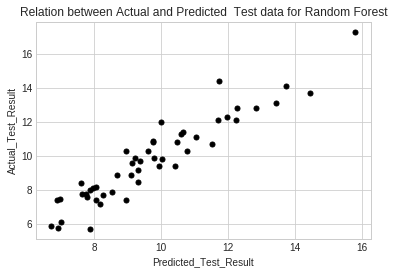

In [0]:
#TEST

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

plt.scatter(y_predict_test_rf,ytest, label='skitscat', color='k', s=25, marker="o")


tit = 'Relation between Actual and Predicted  Test data for Random Forest'
plt.title(tit)
plt.xlabel('Predicted_Test_Result')
plt.ylabel('Actual_Test_Result')

plt.show()

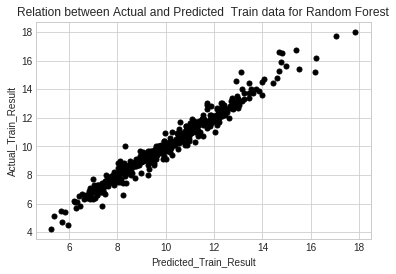

In [0]:
#Train

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

plt.scatter(y_predict_train_rf,ytrain, label='skitscat', color='k', s=25, marker="o")

tit = 'Relation between Actual and Predicted  Train data for Random Forest'
plt.title(tit)
plt.xlabel('Predicted_Train_Result')
plt.ylabel('Actual_Train_Result')

plt.show()

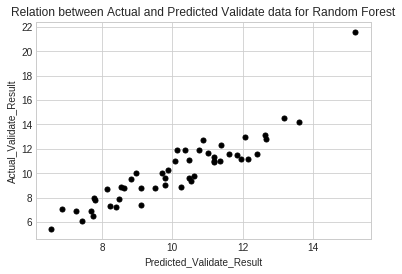

In [0]:
#Validate

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

plt.scatter(y_predict_val_rf,yval, label='skitscat', color='k', s=25, marker="o")

tit = 'Relation between Actual and Predicted Validate data for Random Forest'
plt.title(tit)
plt.xlabel('Predicted_Validate_Result')
plt.ylabel('Actual_Validate_Result')

plt.show()

---------------------
These are the importances...
[0.015 0.016 0.085 0.046 0.046 0.028 0.023 0.101 0.023 0.198 0.137 0.1
 0.128 0.033 0.001 0.019]
Do you see how this lines up below?
---------------------
    State         City  ...  Flag_Large_City  Smoke_Dental_inter
482    ID   Boise City  ...                0                0.18
236    GA     Columbus  ...                0                0.26
252    TN  Chattanooga  ...                0                0.29
146    MA     Lawrence  ...                0                0.18
240    AZ     Surprise  ...                0                0.23

[5 rows x 23 columns]


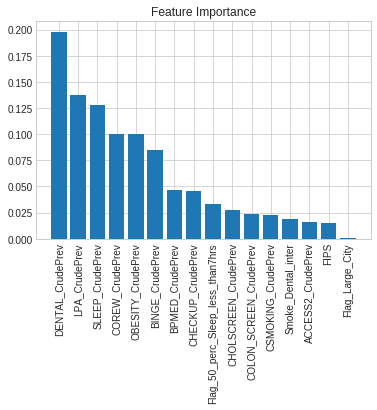

In [0]:
import numpy as np
import matplotlib.pyplot as plt
importances = model.feature_importances_

# let's add a print statement to see what's going on
print("---------------------")
print("These are the importances...")
print(importances)
print("Do you see how this lines up below?")
print("---------------------")
print(pd.DataFrame.head(scaled_df))
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [xtrain.columns[i] for i in indices]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(xtrain.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(xtrain.shape[1]), names, rotation=90)

# Show plot
plt.show()

##Linear Regression

Applied Ridge regularization

In [0]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge

kfold = KFold(n_splits=5, random_state=7)
model = Ridge()
model_result = model.fit(xtrain,ytrain)
scoring = 'neg_mean_absolute_error'
results = cross_val_score(model, xtrain, ytrain, cv=kfold, scoring=scoring)
print("Mean Error:") 
print(results)
print(results.mean())
print(model_result.coef_)
lm = pd.DataFrame(model_result.coef_)

Mean Error:
[-0.617 -0.615 -0.54  -0.63  -0.628]
-0.6060783239123447
[-9.545e-08  1.267e+00 -2.384e+00  4.341e+00 -7.194e-01  2.201e+00
  6.271e-01 -2.139e+00 -3.679e-01 -2.881e+00  1.819e+00  2.489e+00
  2.204e+00  2.401e-01  3.813e-01 -1.361e+00]


In [0]:
y_predict_train = model.predict(xtrain)
y_predict_val = model.predict(xval)
y_predict_test = model.predict(xtest)
#print(y_predict_val)
y_predict_test

array([12.53 ,  7.854, 12.711,  8.103, 11.485, 12.312,  8.929,  8.558,
        8.445,  7.803, 10.705,  7.838,  9.932,  6.352, 14.51 ,  7.743,
       10.858, 11.021, 12.106, 10.923,  9.867, 14.339,  8.829,  9.938,
        9.948,  8.569,  6.515, 11.597, 11.814,  8.503, 11.205,  9.458,
       10.52 , 15.661, 11.901,  9.49 ,  7.57 ,  9.789,  7.495,  7.551,
        6.528,  8.23 ,  7.64 , 10.295,  7.725,  7.27 , 13.946,  7.267,
       12.562,  9.207])

In [0]:

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())
  
  
rmse_train = rmse(y_predict_train_rf,ytrain)   
rmse_val = rmse(y_predict_val_rf,yval) 
rmse_test = rmse(y_predict_test_rf,ytest) 
print(rmse_train,rmse_val,rmse_test)

from sklearn.metrics import mean_absolute_error
mae_train = mean_absolute_error(ytrain, y_predict_train_rf)
mae_val = mean_absolute_error(yval, y_predict_val_rf)
mae_test = mean_absolute_error(ytest, y_predict_test_rf)
print(mae_train,mae_val,mae_test)

0.469924196014634 1.2515054933958547 0.8692594549385126
0.3301750000000001 0.8502000000000001 0.6644000000000001


###SCATTER PLOT FOR LINEAR REGRESSION

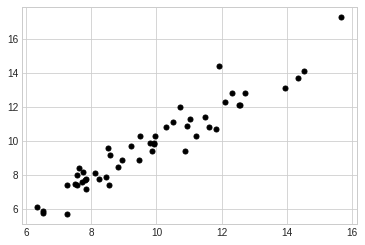

In [0]:
#TEST

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

plt.scatter(y_predict_test,ytest, label='skitscat', color='k', s=25, marker="o")

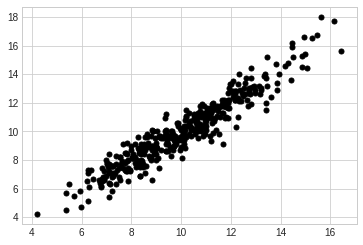

In [0]:
#TRAIN

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

plt.scatter(y_predict_train,ytrain, label='skitscat', color='k', s=25, marker="o")

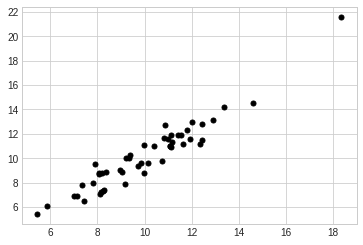

In [0]:
#VAL

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

plt.scatter(y_predict_val,yval, label='skitscat', color='k', s=25, marker="o")

###Mean Absolute Error

In [0]:
from sklearn.metrics import mean_absolute_error
mae_train = mean_absolute_error(ytrain, y_predict_train)
mae_val = mean_absolute_error(yval, y_predict_val)
mae_test = mean_absolute_error(ytest, y_predict_test)
print(mae_train,mae_val,mae_test)

0.5764276147759393 0.6652214236207874 0.5596510186002166


### RMSE

In [0]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())
  
  
rmse_train = rmse(y_predict_train,ytrain)   
rmse_val = rmse(y_predict_val,yval) 
rmse_test = rmse(y_predict_test,ytest) 
print(rmse_train,rmse_val,rmse_test)

0.7356255426483781 0.8642564941082995 0.749771164459997


Plot the residuals for test partition

-0.04494663026091729


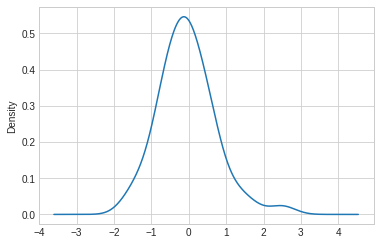

In [0]:
resi_test = ytest-y_predict_test
print(resi_test.mean())
resi_test.plot(kind = 'density')

###Error Table for Linear Regression

In [0]:
import numpy as np
data = np.array(y_predict_test)
columns_new =['predicted_value']
df_Y1= pd.DataFrame(data,columns=columns_new)

data1 = np.array(ytest)
columns_new1 =['Actual_value']
df_Y12= pd.DataFrame(data1,columns=columns_new1)

df_Y1 = pd.concat([df_Y1,df_Y12],axis=1, sort='False')

df_Y1['Error']= round(df_Y1['Actual_value']- df_Y1['predicted_value'],2)


df_Y1['Absolute_Error']= df_Y1.Error.abs()


df_Y1['Squared_error']= round(df_Y1['Absolute_Error']*df_Y1['Absolute_Error'],2)

df_Y1

predicted_value  Actual_value  Error  Absolute_Error  Squared_error
0             12.53          12.1  -0.43            0.43           0.18
1              7.85           7.8  -0.05            0.05           0.00
2             12.71          12.8   0.09            0.09           0.01
3              8.10           8.1  -0.00            0.00           0.00
4             11.49          11.4  -0.09            0.09           0.01
5             12.31          12.8   0.49            0.49           0.24
6              8.93           8.9  -0.03            0.03           0.00
7              8.56           7.4  -1.16            1.16           1.35
8              8.45           7.9  -0.55            0.55           0.30
9              7.80           7.7  -0.10            0.10           0.01
10            10.70          12.0   1.30            1.30           1.69
11             7.84           7.2  -0.64            0.64           0.41
12             9.93           9.8  -0.13            0.13           0.02
13             6.35           6.1  -0.25            0.25           0.06
14            14.51          14.1  -0.41            0.41           0.17
15             7.74           8.2   0.46            0.46           0.21
16            10.86           9.4  -1.46            1.46           2.13
17            11.02          11.3   0.28            0.28           0.08
18            12.11          12.3   0.19            0.19           0.04
19            10.92          10.9  -0.02            0.02           0.00
20             9.87           9.4  -0.47            0.47           0.22
21            14.34          13.7  -0.64            0.64           0.41
22             8.83           8.5  -0.33            0.33           0.11
23             9.94           9.9  -0.04            0.04           0.00
24             9.95          10.3   0.35            0.35           0.12
25             8.57           9.2   0.63            0.63           0.40
26             6.52           5.8  -0.72            0.72           0.52
27            11.60          10.8  -0.80            0.80           0.64
28            11.81          10.7  -1.11            1.11           1.23
29             8.50           9.6   1.10            1.10           1.21
30            11.20          10.3  -0.90            0.90           0.81
31             9.46           8.9  -0.56            0.56           0.31
32            10.52          11.1   0.58            0.58           0.34
33            15.66          17.3   1.64            1.64           2.69
34            11.90          14.4   2.50            2.50           6.25
35             9.49          10.3   0.81            0.81           0.66
36             7.57           7.4  -0.17            0.17           0.03
37             9.79           9.9   0.11            0.11           0.01
38             7.49           7.5   0.01            0.01           0.00
39             7.55           8.0   0.45            0.45           0.20
40             6.53           5.9  -0.63            0.63           0.40
41             8.23           7.8  -0.43            0.43           0.18
42             7.64           8.4   0.76            0.76           0.58
43            10.30          10.8   0.50            0.50           0.25
44             7.72           7.6  -0.12            0.12           0.01
45             7.27           5.7  -1.57            1.57           2.46
46            13.95          13.1  -0.85            0.85           0.72
47             7.27           7.4   0.13            0.13           0.02
48            12.56          12.1  -0.46            0.46           0.21
49             9.21           9.7   0.49            0.49           0.24

##KNN Model

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
	
scaler = StandardScaler().fit(xtrain)

num_folds = 10
k_values = np.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model2 = KNeighborsRegressor()
model2 = model2.fit(xtrain,ytrain)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model2, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(xtrain, ytrain)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	 print("%f (%f) with: %r" % (mean, stdev, param))
  


Best: -1.793917 using {'n_neighbors': 9}
-2.430500 (0.351299) with: {'n_neighbors': 1}
-1.978583 (0.270888) with: {'n_neighbors': 3}
-1.885700 (0.265517) with: {'n_neighbors': 5}
-1.830500 (0.251957) with: {'n_neighbors': 7}
-1.793917 (0.240621) with: {'n_neighbors': 9}
-1.801955 (0.239907) with: {'n_neighbors': 11}
-1.821962 (0.222986) with: {'n_neighbors': 13}
-1.838183 (0.224989) with: {'n_neighbors': 15}
-1.836206 (0.237380) with: {'n_neighbors': 17}
-1.835474 (0.241079) with: {'n_neighbors': 19}
-1.827690 (0.235683) with: {'n_neighbors': 21}


In [0]:
y_predict_train_model2 = model2.predict(xtrain)
y_predict_val_model2 = model2.predict(xval)
y_predict_test_model2 = model2.predict(xtest)

###MAE KNN

In [0]:
from sklearn.metrics import mean_absolute_error
mae_train_knn = mean_absolute_error(ytrain, y_predict_train_model2)
mae_val_knn = mean_absolute_error(yval, y_predict_val_model2)
mae_test_knn = mean_absolute_error(ytest, y_predict_test_model2)
print(mae_train_knn,mae_val_knn,mae_test_knn)

1.5089000000000001 1.912 1.7768000000000002


###RMSE KNN

In [0]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())
  
  
rmse_train_knn = rmse(y_predict_train_model2,ytrain)   
rmse_val_knn = rmse(y_predict_val_model2,yval) 
rmse_test_knn = rmse(y_predict_test_model2,ytest) 
print(rmse_train_knn,rmse_val_knn,rmse_test_knn)

1.896630169537541 2.6456485027304746 2.2900375542772218


###Error Table on KNN Test Data

In [0]:
import numpy as np
data = np.array(y_predict_test_model2)
columns_new =['predicted_value']
df_Y1= pd.DataFrame(data,columns=columns_new)

data1 = np.array(ytest)
columns_new1 =['Actual_value']
df_Y12= pd.DataFrame(data1,columns=columns_new1)

df_Y1 = pd.concat([df_Y1,df_Y12],axis=1, sort='False')

df_Y1['Error']= round(df_Y1['Actual_value']- df_Y1['predicted_value'],2)


df_Y1['Absolute_Error']= df_Y1.Error.abs()


df_Y1['Squared_error']= round(df_Y1['Absolute_Error']*df_Y1['Absolute_Error'],2)

df_Y1.head()

predicted_value  Actual_value  Error  Absolute_Error  Squared_error
0            11.78          12.1   0.32            0.32           0.10
1            10.10           7.8  -2.30            2.30           5.29
2            11.32          12.8   1.48            1.48           2.19
3             8.36           8.1  -0.26            0.26           0.07
4            10.18          11.4   1.22            1.22           1.49

###SD of Absolute_Error on Test Data(KNN)

In [0]:
sd_absolute_error_test_knn=df_Y1['Absolute_Error'].std()
sd_absolute_error_test_knn

1.4594008275693842

###Average of Error on Test Data(KNN)

In [0]:
bias_test_knn= df_Y1['Error'].mean()
bias_test_knn

-0.06480000000000002

###Error Table on Validation  Data  (KNN)

In [0]:
import numpy as np
data = np.array(y_predict_val_model2)
columns_new =['predicted_value']
df_Y1= pd.DataFrame(data,columns=columns_new)

data1 = np.array(yval)
columns_new1 =['Actual_value']
df_Y12= pd.DataFrame(data1,columns=columns_new1)

df_Y1 = pd.concat([df_Y1,df_Y12],axis=1, sort='False')

df_Y1['Error']= round(df_Y1['Actual_value']- df_Y1['predicted_value'],2)


df_Y1['Absolute_Error']= df_Y1.Error.abs()


df_Y1['Squared_error']= round(df_Y1['Absolute_Error']*df_Y1['Absolute_Error'],2)

df_Y1.head()

predicted_value  Actual_value  Error  Absolute_Error  Squared_error
0             9.64          11.0   1.36            1.36           1.85
1            10.34           7.4  -2.94            2.94           8.64
2             8.82          10.3   1.48            1.48           2.19
3            10.70           7.2  -3.50            3.50          12.25
4            12.68          14.2   1.52            1.52           2.31

###SD of Absolute_Error on Validation Data(KNN)

In [0]:
sd_absolute_error_val_knn=df_Y1['Absolute_Error'].std()
sd_absolute_error_val_knn

1.8471467241148345

###Average of Error on Validation Data(KNN)

In [0]:
bias_val_knn= df_Y1['Error'].mean()
bias_val_knn

0.09680000000000005

###Error Table on Train Data  (KNN)

In [0]:
import numpy as np
data = np.array(y_predict_train_model2)
columns_new =['predicted_value']
df_Y1= pd.DataFrame(data,columns=columns_new)

data1 = np.array(ytrain)
columns_new1 =['Actual_value']
df_Y12= pd.DataFrame(data1,columns=columns_new1)

df_Y1 = pd.concat([df_Y1,df_Y12],axis=1, sort='False')

df_Y1['Error']= round(df_Y1['Actual_value']- df_Y1['predicted_value'],2)


df_Y1['Absolute_Error']= df_Y1.Error.abs()


df_Y1['Squared_error']= round(df_Y1['Absolute_Error']*df_Y1['Absolute_Error'],2)

df_Y1.head()

predicted_value  Actual_value  Error  Absolute_Error  Squared_error
0             8.98           8.0  -0.98            0.98           0.96
1            12.14          12.9   0.76            0.76           0.58
2            10.18          13.0   2.82            2.82           7.95
3            10.76          13.7   2.94            2.94           8.64
4             9.22           9.6   0.38            0.38           0.14

###SD of Absolute_Error on Train Data(KNN)

In [0]:
sd_absolute_error_train_knn=df_Y1['Absolute_Error'].std()
sd_absolute_error_train_knn

1.1505373224393096

###Average of Error on Test Data(KNN)

In [0]:
bias_train_knn= df_Y1['Error'].mean()
bias_train_knn

-0.05309999999999995

###Mean absolute percentage error test data (KNN)

In [0]:
def mean_absolute_percentage_error(ytest, y_predict_test_rf): 
    ytest, y_predict_test_rf = np.array(ytest), np.array(y_predict_test_rf)
    return np.mean(np.abs((ytest - y_predict_test_rf) / ytest)) * 100
 
MAPE_test_knn= mean_absolute_percentage_error(ytest, y_predict_test_model2)
MAPE_test_knn

19.26977991804723

###Mean absolute percentage error train data (KNN)

In [0]:
MAPE_train_knn= mean_absolute_percentage_error(ytrain,y_predict_train_model2)
MAPE_train_knn

16.163523522074094

###Mean absolute percentage error validation data (KNN)



In [0]:
MAPE_val_knn= mean_absolute_percentage_error(yval,y_predict_val_model2)
MAPE_val_knn

19.575392397381144

###Error Matrix for KNN

In [0]:
data1 = [{'MAE':mae_train_knn, 'RMSE':rmse_train_knn, 'SD(AE)':sd_absolute_error_train_knn, 'BIAS':bias_train_knn, 'MAPE':MAPE_train_knn}, {'MAE':mae_val_knn, 'RMSE':rmse_val_knn, 'SD(AE)':sd_absolute_error_val_knn, 'BIAS':bias_val_knn, 'MAPE':MAPE_val_knn},{'MAE':mae_test_knn, 'RMSE':rmse_test_knn, 'SD(AE)':sd_absolute_error_test_knn, 'BIAS':bias_test_knn, 'MAPE':MAPE_test_knn}]

df_error_matrix_knn = pd.DataFrame(data1, index =['Train', 'Validate', 'Test'])

df_error_matrix_knn

BIAS   MAE   MAPE  RMSE  SD(AE)
Train    -0.05  1.51  16.16  1.90    1.15
Validate  0.10  1.91  19.58  2.65    1.85
Test     -0.06  1.78  19.27  2.29    1.46

###KNN SCATTER PLOT FOR ACTUAL AND PREDICTED

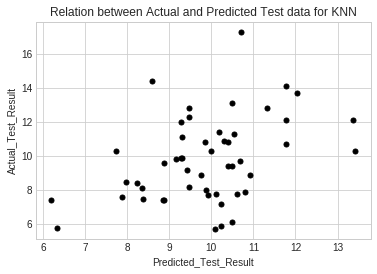

In [0]:
#TEST

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

plt.scatter(y_predict_test_model2,ytest, label='skitscat', color='k', s=25, marker="o")


tit = 'Relation between Actual and Predicted Test data for KNN'
plt.title(tit)
plt.xlabel('Predicted_Test_Result')
plt.ylabel('Actual_Test_Result')

plt.show()

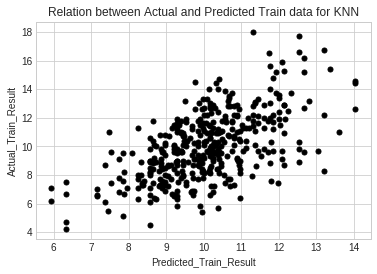

In [0]:
#Train

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

plt.scatter(y_predict_train_model2,ytrain, label='skitscat', color='k', s=25, marker="o")

tit = 'Relation between Actual and Predicted Train data for KNN'
plt.title(tit)
plt.xlabel('Predicted_Train_Result')
plt.ylabel('Actual_Train_Result')

plt.show()

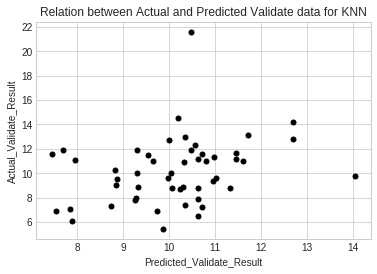

In [0]:
#Validate

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

plt.scatter(y_predict_val_model2,yval, label='skitscat', color='k', s=25, marker="o")

tit = 'Relation between Actual and Predicted Validate data for KNN'
plt.title(tit)
plt.xlabel('Predicted_Validate_Result')
plt.ylabel('Actual_Validate_Result')

plt.show()

###Partial Dependence plots after model is made

In [0]:
pip install pdpbox

     |████████████████████████████████| 57.7MB 1.4MB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.0-cp36-none-any.whl size=57690723 sha256=05e6cd47fae0335ac8dd68e020ddf914a334472b7ceb230dde16b6d8d148d7ed
  Stored in directory: /root/.cache/pip/wheels/7d/08/51/63fd122b04a2c87d780464eeffb94867c75bd96a64d500a3fe
Successfully built pdpbox


Random forest partial dependence plots

In [0]:
pip install pdpbox

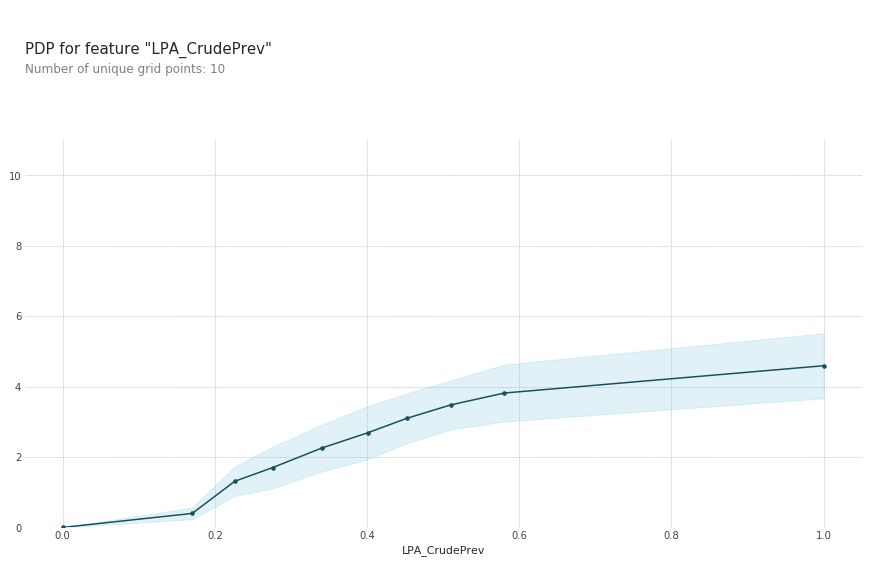

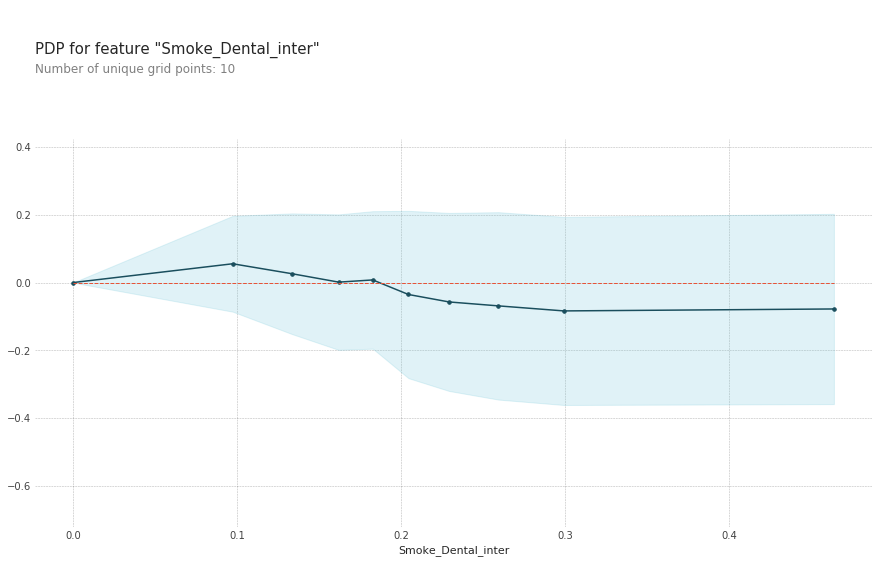

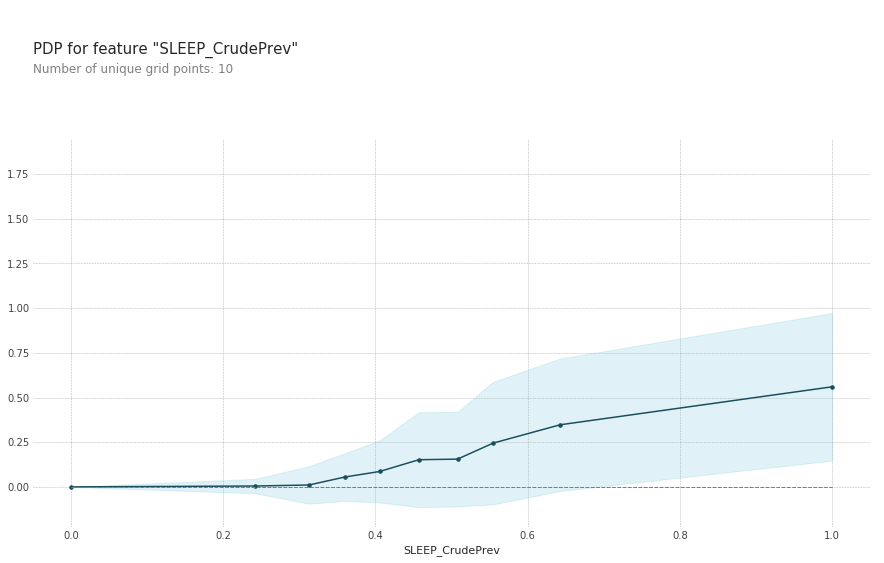

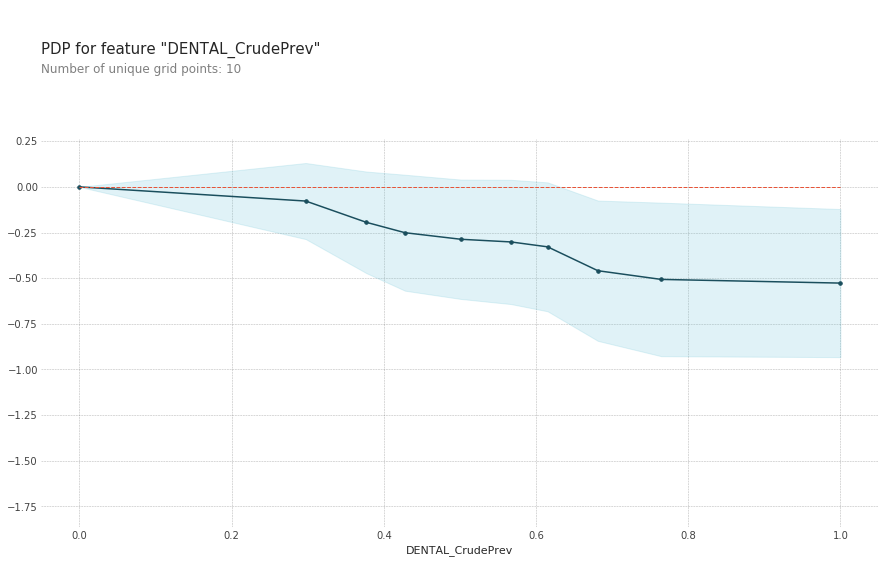

In [0]:
from pdpbox import pdp, get_dataset, info_plots
import numpy as np
	
model = RandomForestRegressor(random_state=seed)
model.fit(xtrain, ytrain)
#PDP for Lack of physical activity
pdp_LPA = pdp.pdp_isolate(model=model, dataset = scaled_df, model_features=xtrain.columns.values, feature='LPA_CrudePrev')
fig, axes = pdp.pdp_plot(pdp_LPA, 'LPA_CrudePrev')

#PDP for Smoke and Dental interaction term
pdp_smoke_dental = pdp.pdp_isolate(model=model, dataset = scaled_df, model_features=xtrain.columns.values, feature='Smoke_Dental_inter')
fig, axes = pdp.pdp_plot(pdp_smoke_dental, 'Smoke_Dental_inter')


#PDP for Sleep
pdp_Sleep = pdp.pdp_isolate(model=model, dataset = scaled_df, model_features=xtrain.columns.values, feature='SLEEP_CrudePrev')
fig, axes = pdp.pdp_plot(pdp_Sleep, 'SLEEP_CrudePrev')


#PDP for dental
pdp_Dental = pdp.pdp_isolate(model=model, dataset = scaled_df, model_features=xtrain.columns.values, feature='DENTAL_CrudePrev')
fig, axes = pdp.pdp_plot(pdp_Dental, 'DENTAL_CrudePrev')

###The top 5 states having the highest percentage of population diaganosed with diabetes are: Delaware, Massechussets, West Virginia, Ohio and Maryland

In [0]:
data_1 = scaled_df[['State','DIABETES_CrudePrev']].groupby(['State'], as_index=False).mean().sort_values(by='DIABETES_CrudePrev', ascending=False)
data_1.head(10)

State  DIABETES_CrudePrev
8     DE               13.90
25    MS               13.55
49    WV               13.50
35    OH               13.47
20    MD               13.20
18    LA               12.73
1     AL               12.73
31    NJ               12.23
38    PA               11.73
9     FL               11.66